

 ### Афинные преобразования — это класс геометрических преобразований, которые сохраняют прямые линии, параллельность и отношения расстояний между точками на одной прямой (но не обязательно сами расстояния и углы). Они описываются линейными преобразованиями, объединёнными с переносом.



 Примеры афинных преобразований:



 - Сдвиг (перенос);

 - Масштабирование;

 - Поворот;

 - Отражение;

 - Сдвиг (shear).

 Ниже представлена функция, которая на вход принимает изображение, матрицу преобразования, и возвращает преобразованный результат и выводит его на экран.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
class Shower:
    def show_img(
        img_mtx: np.ndarray,
        extra_img_params: dict = {},
        in_gray: bool = True,
        is_show: bool = True,
        figsize: tuple = None
    ):
        '''
            cmap='gray': display the image in grayscale
        '''

        if in_gray:
            img_params = {'X': img_mtx} | {'cmap': 'gray'} | extra_img_params
        else:
            img_params = {'X': img_mtx} | extra_img_params

        if figsize is not None:
            plt.figure(figsize=figsize)

        plt.imshow(**img_params)
        plt.axis('off')

        if is_show:
            plt.show()

    def show_two_img(
        img_mtx1: np.ndarray,
        img_mtx2: np.ndarray,
        title_img1: str = None,
        title_img2: str = None,
        extra_img1_params: dict = {},
        extra_img2_params: dict = {},
        figsize: tuple = (8, 12)
    ):
        plt.figure(figsize=figsize)

        plt.subplot(1, 2, 1)
        Shower.show_img(img_mtx1, extra_img1_params, is_show=False)
        if title_img1:
            plt.title(title_img1)

        plt.subplot(1, 2, 2)
        Shower.show_img(img_mtx2, extra_img2_params, is_show=False)
        if title_img2:
            plt.title(title_img2)

        plt.tight_layout()  # fit into the figure area without overlapping
        plt.show()



In [3]:
PICTURES_PATH = 'materials/imgs/'

In [4]:
PICTURE1_PATH = PICTURES_PATH + 'street.jpg'

In [5]:
def warp_affine(image, M, output_shape):
    """
    Применяет афинное преобразование к изображению.

    Параметры:
        image: numpy.ndarray
            Входное изображение.
        M: numpy.ndarray
            Матрица афинного преобразования 3x3.
        output_shape: tuple
            Размер выходного изображения в формате (rows, cols, channels).

    Возвращает:
        numpy.ndarray
            Изображение после афинного преобразования.
    """
    rows, cols, *_ = image.shape  # Определяем размеры исходного изображения
    # Определяем размеры выходного изображения
    out_rows, out_cols, *_ = output_shape

    # Создаем пустой массив для результата
    output = np.zeros(output_shape, dtype=image.dtype)

    # Итерируемся по каждому пикселю выходного изображения
    for out_row in range(out_rows):
        for out_col in range(out_cols):
            # Преобразуем координаты пикселя из выходного пространства в входное
            in_col, in_row, _ = np.dot(M, [out_col, out_row, 1]).astype(int)

            # Проверяем, находятся ли преобразованные координаты внутри границ входного изображения
            if 0 <= in_row < rows and 0 <= in_col < cols:
                # Копируем значение пикселя из входного изображения в выходное
                output[out_row, out_col, :] = image[in_row, in_col, :]

    return output

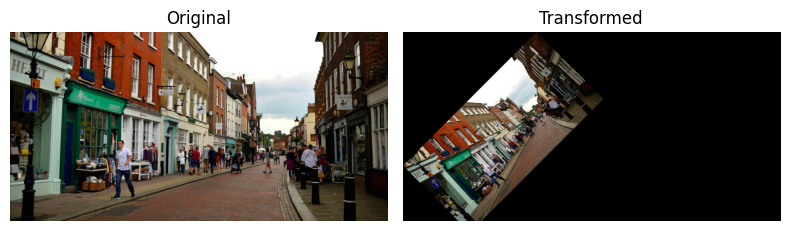

In [6]:
# загрузка картинки
image = plt.imread(PICTURE1_PATH)

# угол поворота картинки
th = np.radians(45)

# # задаем матрицу транфсормации
M = np.float32(
    [[np.cos(th), -np.sin(th), image.shape[0]],
     [np.sin(th), np.cos(th), -image.shape[1]/2],
     [0, 0, 1]],
)

shape = (image.shape[0]*2, image.shape[1]*2, image.shape[2])


# применяем афинное преобразование
result = warp_affine(image, M, shape)

Shower.show_two_img(
    image,
    result,
    title_img1='Original',
    title_img2='Transformed'
)


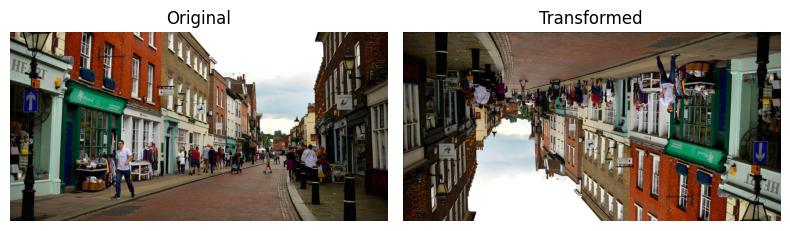

In [7]:
# пример переворота изображения

# угол поворота картинки
th = np.radians(180)

# задаем матрицу транфсормации
M = np.float32(
    [[np.cos(th), -np.sin(th), image.shape[1]],
     [np.sin(th), np.cos(th), image.shape[0]],
     [0, 0, 1]],
)

# задаем размеры входного изображения
shape = (image.shape[0], image.shape[1], image.shape[2])

# применяем афинное преобразование
result = warp_affine(image, M, shape)

Shower.show_two_img(
    image,
    result,
    title_img1='Original',
    title_img2='Transformed'
)


 # ДЗ: Дополнительные преобразования с помощью функции warp_affine()

 Преобразуйте представленное изображение 4-мя различными способами:

 - Полный переворот сверху-вниз;

 - Поворот на 90 градусов против часовой стрелки;

 - Зеркальное отображение относительно оси-0Y;

 - Растяжение по OX в два раза и растяжение по 0Y два раза;



 Для выполнения подбирайте правильно параметры выходного изображения также как и элементы матрицы преобразований M, чтобы все преобразованное изображение помещалось в выходном графике.

In [8]:
PICTURE2_PATH = PICTURES_PATH + 'street_2.jpeg'

In [9]:
# загрузка картинки
hw_image = plt.imread(PICTURE2_PATH)

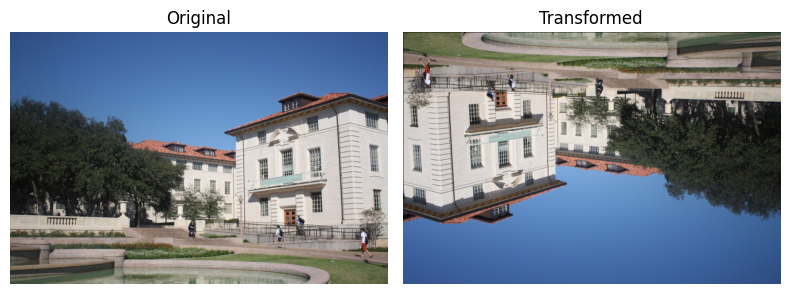

In [10]:
# ПОЛНЫЙ ПЕРЕВОРОТ СВЕРХУ-ВНИЗ

# угол поворота картинки
th = np.radians(180)

# задаем матрицу транфсормации
M = np.float32(
    [[np.cos(th), -np.sin(th), hw_image.shape[1]],
     [np.sin(th), np.cos(th), hw_image.shape[0]],
     [0, 0, 1]],
)

# задаем размеры входного изображения
shape = (hw_image.shape[0], hw_image.shape[1], hw_image.shape[2])

# применяем афинное преобразование
result = warp_affine(hw_image, M, shape)

Shower.show_two_img(
    hw_image,
    result,
    title_img1='Original',
    title_img2='Transformed'
)


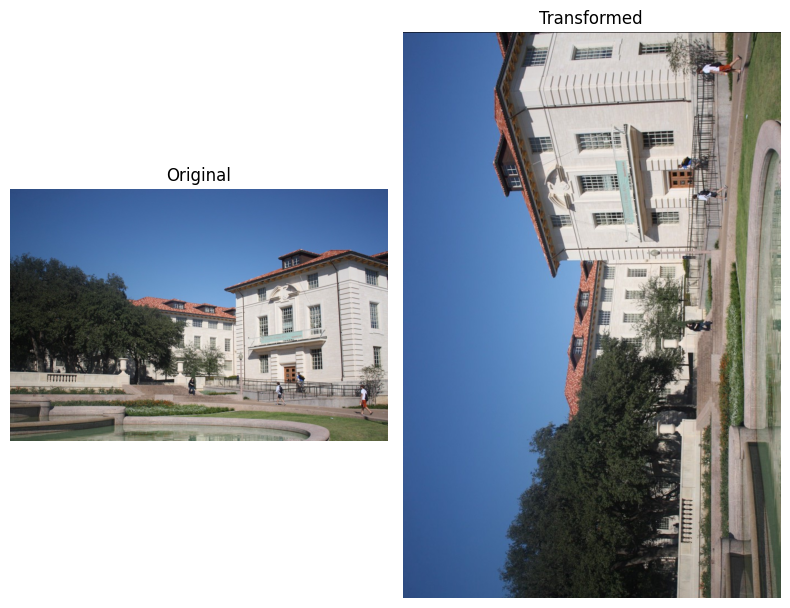

In [11]:
# ПОВОРОТ НА 90 ГРАДУСОВ ПРОТИВ ЧАСОВОЙ СТРЕЛКИ

# угол поворота картинки
th = np.radians(90)

# задаем матрицу транфсормации
M = np.float32(
    [[np.cos(th), -np.sin(th), hw_image.shape[1]],
     [np.sin(th), np.cos(th), 0],
     [0, 0, 0]],
)

# задаем размеры входного изображения
shape = (hw_image.shape[1], hw_image.shape[0], hw_image.shape[2])

# применяем афинное преобразование
result = warp_affine(hw_image, M, shape)

Shower.show_two_img(
    hw_image,
    result,
    title_img1='Original',
    title_img2='Transformed'
)


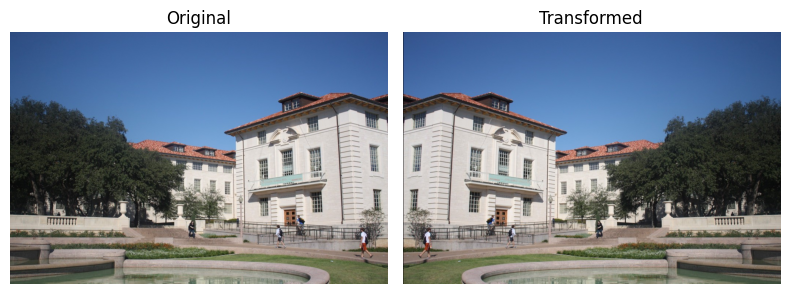

In [12]:
# ЗЕРКАЛЬНОЕ ОТРАЖЕНИЕ ОТНОСИТЕЛЬНО ОСИ-OY


# задаем матрицу транфсормации
M = np.float32(
    [[-1, 0, hw_image.shape[1]],   # Flip horizontally and translate to keep it in view
     [0, 1, 0],        # Keep y-coordinates unchanged
     [0, 0, 1]]        # Homogeneous coordinate
)

# задаем размеры входного изображения
shape = (hw_image.shape[0], hw_image.shape[1], hw_image.shape[2])

# применяем афинное преобразование
result = warp_affine(hw_image, M, shape)

Shower.show_two_img(
    hw_image,
    result,
    title_img1='Original',
    title_img2='Transformed'
)


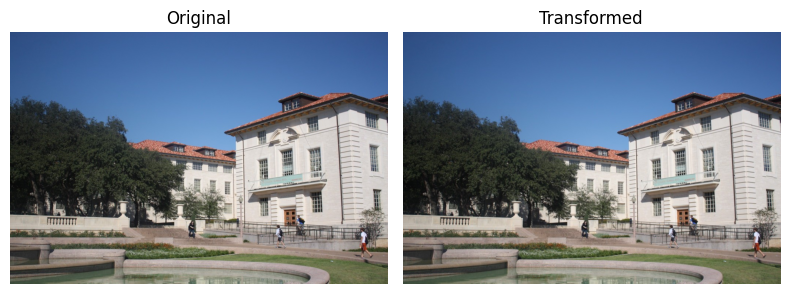

In [13]:
# РАСТЯЖЕНИЕ ПО OX В ДВА РАЗА И РАСТЯЖЕНИЕ ПО OY В ДВА РАЗА

# задаем матрицу транфсормации
M = np.float32(
    [[1/2, 0, 0],
     [0, 1/2, 0],
     [0, 0, 1]]
)

# задаем размеры входного изображения:
# [ATTANTION] FOR SEE THE SCALING YOU NEED TO DELETE *2 FOR TRANSFORMED PICTURE
shape = (hw_image.shape[0]*2, hw_image.shape[1]*2, hw_image.shape[2])

# применяем афинное преобразование
result = warp_affine(hw_image, M, shape)

Shower.show_two_img(
    hw_image,
    result,
    title_img1='Original',
    title_img2='Transformed'
)
